In [109]:
from construct_eq_fpr_df import construct_df_for_eq_div_fpr
from construct_eq_fpr_df import get_fpr_eq_div
from get_data_fico import get_fpr_tpr_fico
from get_data_fico import get_base_rates
from get_data_fico import get_totals
import matplotlib.pylab as plt 
#from responsibly.dataset import build_FICO_dataset
from fairmlbook.code.creditscore_compas import criteria
from onehalfthreshold import get_optimal_fp_tp
from onehalfthreshold import get_optimal_fp_tp_hardtf
from onehalfthreshold import get_indices_for_a_opt
from onehalfthreshold import get_fpa_opt_tpa_opt_thres_a_opt
from matplotlib.font_manager import FontProperties
import pandas as pd 

In [110]:
%%markdown
# Data 

# Data 


In [111]:
#list of attributes are Asian, Hispanic, Black, White 
fpr_df, tpr_df = get_fpr_tpr_fico()
data_fpr_Asian = fpr_df['Asian']
data_tpr_Asian = tpr_df['Asian']

data_fpr_Hispanic = fpr_df['Hispanic']
data_tpr_Hispanic = tpr_df['Hispanic']

data_fpr_Black = fpr_df['Black']
data_tpr_Black = tpr_df['Black']

data_fpr_White = fpr_df['White']
data_tpr_White = tpr_df['White']

#fraction of non-defaulters in each group 
fraction_non_defaulters = get_base_rates()

totals = get_totals()

In [112]:
eq_fpr_df = construct_df_for_eq_div_fpr(fpr_df,tpr_df,division=0.001)
print(eq_fpr_df)

Index(['Asian', 'Black', 'Hispanic', 'White'], dtype='object')
       Asian_tpr Asian_threshold  Black_tpr Black_threshold Hispanic_tpr  \
0.000          0             101          0             100            0   
0.001  0.0284424         97.8493  0.0569956         88.8561    0.0566159   
0.002    0.05543         96.0177  0.0962776         83.1231    0.0930819   
0.003  0.0808284         94.2304   0.137937         77.6382     0.121975   
0.004   0.105064         92.3585   0.169887         73.7316     0.147034   
...          ...             ...        ...             ...          ...   
0.995    0.99993        0.893144   0.999933        0.617852     0.999943   
0.996   0.999944        0.814515   0.999948        0.588004     0.999954   
0.997   0.999958        0.735886   0.999963        0.558156     0.999966   
0.998   0.999972        0.657258   0.999979        0.528308     0.999978   
0.999   0.999986        0.578629   0.999993        0.475461     0.999989   

      Hispanic_threshold

In [113]:
drop_thresholds_df = eq_fpr_df.drop(columns = ['Asian_threshold','Black_threshold', 'Hispanic_threshold','White_threshold'])
print(drop_thresholds_df)

       Asian_tpr  Black_tpr Hispanic_tpr  White_tpr
0.000          0          0            0          0
0.001  0.0284424  0.0569956    0.0566159  0.0317237
0.002    0.05543  0.0962776    0.0930819  0.0609469
0.003  0.0808284   0.137937     0.121975  0.0877923
0.004   0.105064   0.169887     0.147034   0.113204
...          ...        ...          ...        ...
0.995    0.99993   0.999933     0.999943   0.999968
0.996   0.999944   0.999948     0.999954   0.999974
0.997   0.999958   0.999963     0.999966   0.999981
0.998   0.999972   0.999979     0.999978   0.999987
0.999   0.999986   0.999993     0.999989   0.999994

[1000 rows x 4 columns]


In [114]:
%%markdown 
## Pointwise minimum curves 

## Pointwise minimum curves 


In [115]:
pointwise_min_df = drop_thresholds_df.min(axis=1)
print(pointwise_min_df)
eq_fpr = list(get_fpr_eq_div(division=0.001))
min_tpr = list(pointwise_min_df)

0.000    0.000000
0.001    0.028442
0.002    0.055430
0.003    0.080828
0.004    0.105064
           ...   
0.995    0.999930
0.996    0.999944
0.997    0.999958
0.998    0.999972
0.999    0.999986
Length: 1000, dtype: float64


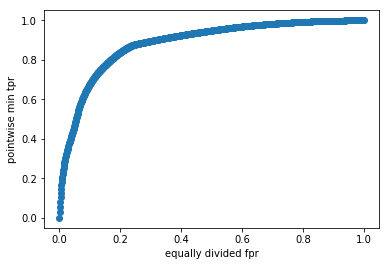

In [116]:
plt.plot(eq_fpr,min_tpr,'-o')
plt.xlabel('equally divided fpr')
plt.ylabel('pointwise min tpr')
plt.show()

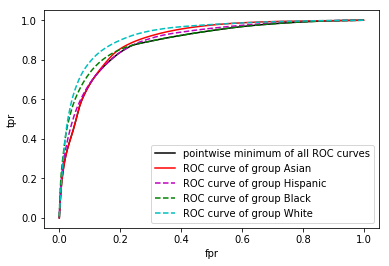

In [117]:
plt.plot(eq_fpr,min_tpr,'k',label='pointwise minimum of all ROC curves')
plt.plot(data_fpr_Asian, data_tpr_Asian,'-r',label='ROC curve of group Asian')
plt.plot(data_fpr_Hispanic,data_tpr_Hispanic,'--m',label='ROC curve of group Hispanic')
plt.plot(data_fpr_Black,data_tpr_Black,'--g',label='ROC curve of group Black')
plt.plot(data_fpr_White,data_tpr_White,'--c',label='ROC curve of group White')
plt.legend()

plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [118]:
%%markdown
## Optimal false positive and true positive

## Optimal false positive and true positive


In [119]:
%%markdown 
## Optimal false positive and true positive rates output from semi-threshold classifier framework

## Optimal false positive and true positive rates output from semi-threshold classifier framework


In [120]:
target_rate = 5/6 #(this means loss from loaning to defaulter is 6 times as expensive as for profit from loaning to non-defaulter)
profit_semi, opt_fp_semi,opt_tp_semi = get_optimal_fp_tp_hardtf(totals, fraction_non_defaulters,target_rate,pointwise_min_df, eq_fpr) 
print('optimal fp from linear program assuming concave roc curves with target rate:' + str(target_rate) + '=', opt_fp_semi)
print('optimal tp from linear program assuming concave roc curves with target rate:' + str(target_rate) + '=', opt_tp_semi)
print('optimal profit from semi-threshold classifiers with target rate:' + str(target_rate) + '=', profit_semi)

optimal fp from linear program assuming concave roc curves with target rate:0.8333333333333334= 0.115
optimal tp from linear program assuming concave roc curves with target rate:0.8333333333333334= 0.7115204936866923
optimal profit from semi-threshold classifiers with target rate:0.8333333333333334= 9460.50624645945


In [121]:
%%markdown 
## Optimal false positive and true positive rates outfput from Hardt, Price and Sebro's framework


## Optimal false positive and true positive rates outfput from Hardt, Price and Sebro's framework


In [122]:
DATA_DIR='fairmlbook/code/creditscore_compas/data/'
def cleanup_frame(frame):
    """Rename and re-order columns"""
    frame = frame.rename(columns={'Non- Hispanic white': 'White'})
    frame = frame.reindex(['Asian', 'Black', 'Hispanic', 'White'], axis=1)
    return frame

def read_totals():
    """Read the total number of people of each race"""
    frame = cleanup_frame(pd.read_csv(DATA_DIR+files['overall'], index_col=0))
    return {r:frame[r]['SSA'] for r in frame.columns}

def parse_data(data_dir=DATA_DIR):
    """Parse sqf data set."""

    cdfs = cleanup_frame(pd.read_csv(data_dir+files['cdf_by_race'], index_col=0))
    performance = 100-cleanup_frame(pd.read_csv(data_dir+files['performance_by_race'], index_col=0))
    return (cdfs/100., performance/100.)

files = dict(cdf_by_race = 'transrisk_cdf_by_race_ssa.csv',
             performance_by_race = 'transrisk_performance_by_race_ssa.csv',
             overall = 'totals.csv')

cdfs = cleanup_frame(pd.read_csv(DATA_DIR+files['cdf_by_race'], index_col=0))
performance = 100-cleanup_frame(pd.read_csv(DATA_DIR+files['performance_by_race'], index_col=0))

data_pair = parse_data()
totals = read_totals()

In [123]:
data = criteria.CriteriaData(data_pair[0], data_pair[1], totals)
result = data.two_sided_optimum(target_rate) #same target rate we used for semi-threshold classifiers 
profit_hps, opt_fp_hps, opt_tp_hps = result[0],result[1][1],result[1][0]
print('optimal fp from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=' , opt_fp_hps)
print('optimal tp from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=', opt_tp_hps)
print('optimal profit from Hardt,Price and Sebro\'s framework with target rate:' + str(target_rate) + '=', profit_hps)

optimal fp from Hardt,Price and Sebro's framework with target rate:0.8333333333333334= 0.11393540338532593
optimal tp from Hardt,Price and Sebro's framework with target rate:0.8333333333333334= 0.709169501828308
optimal profit from Hardt,Price and Sebro's framework with target rate:0.8333333333333334= 9458.991724581278


In [124]:
%%markdown
## Plot data 

## Plot data 


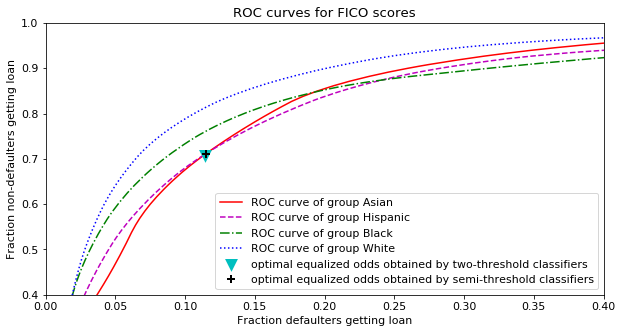

In [125]:
f = plt.figure(figsize=(10, 5))
#plt.plot(eq_fpr,min_tpr,'k',label='pointwise minimum of all ROC curves')
plt.rcParams.update({'font.size': 11})
plt.plot(data_fpr_Asian, data_tpr_Asian,'-r',label='ROC curve of group Asian')
plt.plot(data_fpr_Hispanic,data_tpr_Hispanic,'--m',label='ROC curve of group Hispanic')
plt.plot(data_fpr_Black,data_tpr_Black,'-.g',label='ROC curve of group Black')
plt.plot(data_fpr_White,data_tpr_White,':b',label='ROC curve of group White')
plt.plot(opt_fp_hps, opt_tp_hps,'vc',mew=3, ms=8,label = 'optimal equalized odds obtained by two-threshold classifiers')
plt.plot(opt_fp_semi,opt_tp_semi,'+k',mew=2, ms=8,label = 'optimal equalized odds obtained by semi-threshold classifiers')
plt.legend(loc=0)
plt.xlim([0.0,0.4])
plt.ylim([0.4,1])

plt.xlabel('Fraction defaulters getting loan')
plt.ylabel('Fraction non-defaulters getting loan')
plt.title('ROC curves for FICO scores')
plt.show()
#f.savefig('figures/zoomed_fico_tr_2_3.png')
#f.savefig('figures/fico_tr_2_3.png')

In [126]:
%%markdown 
## Find threshold and probability of semi-threshold classifier for each attribute (at diff target rates)

## Find threshold and probability of semi-threshold classifier for each attribute (at diff target rates)


In [127]:
#Opt values for different loss function ratios! 
target_rate_list = [2/3,1/3,5/6,3/5]
opt_fp_list = []
opt_tp_list = []

for i in range(0, len(target_rate_list)):
    profit,opt_semi_fp, opt_semi_tp = get_optimal_fp_tp_hardtf(totals, fraction_non_defaulters,target_rate_list[i],pointwise_min_df, eq_fpr) 
    print('optimal fp:', opt_semi_fp)
    print('optimal tp:', opt_semi_tp)
    opt_fp_list.append(opt_semi_fp)
    opt_tp_list.append(opt_semi_tp)
    

optimal fp: 0.226
optimal tp: 0.8623462434379815
optimal fp: 0.535
optimal tp: 0.9554071623628332
optimal fp: 0.115
optimal tp: 0.7115204936866923
optimal fp: 0.241
optimal tp: 0.8740603459819504


Opt ratio:  3.815691342645936
Opt false positive one threshold for group Asian: 0.23100845428628633
Opt true positive one threshold for group Asian: 0.8814569590982022
Opt threshold one threshold for group Asian: 35.049182979864725
Opt probablity p_a group Asian: 0.978319173201863
Opt false positive one threshold for group Hispanic: 0.226
Opt true positive one threshold for group Hispanic: 0.8623462434379815
Opt threshold one threshold for group Hispanic: 27.976705699784564
Opt probablity p_a group Hispanic: 1.0
Opt false positive one threshold for group White: 0.2421622181952487
Opt true positive one threshold for group White: 0.9240162794835466
Opt threshold one threshold for group White: 29.34472724736369
Opt probablity p_a group White: 0.9332587126278405
Opt false positive one threshold for group Black: 0.22751140832938255
Opt true positive one threshold for group Black: 0.8681133111156094
Opt threshold one threshold for group Black: 21.840426554602427
Opt probablity p_a group Blac

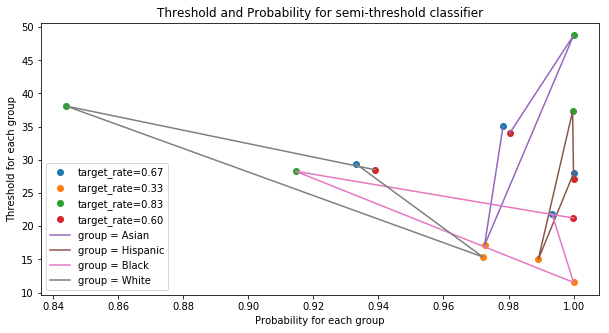

In [130]:
ta_pa_attr_dict = {'Asian': ([],[]), 'Hispanic': ([],[]), 'Black':([],[]), 'White': ([],[])}
f = plt.figure(figsize=(10, 5))
plt.rcParams.update({'font.size': 10})
for i in range(0,len(opt_fp_list)):
    opt_slope = opt_tp_list[i]/opt_fp_list[i]
    print('Opt ratio: ',opt_slope)
    same_opt_ratio_ta = []
    same_opt_ratio_pa = []
    for attr in list_attrs: 
        tp_attr_list = list(eq_fpr_df[attr+'_tpr'])
        found_index_1, found_index_2 = get_indices_for_a_opt(opt_slope,eq_fpr,tp_attr_list,0,len(eq_fpr) - 1)
        threshold_attr_list = list(eq_fpr_df[attr+'_threshold'])
        fpr_1 = eq_fpr[found_index_1]
        fpr_2 = eq_fpr[found_index_2]
        tpr_1 = tp_attr_list[found_index_1]
        tpr_2 = tp_attr_list[found_index_2]
        threshold_1 = threshold_attr_list[found_index_1]
        threshold_2 = threshold_attr_list[found_index_2]
        fpa_opt,tpa_opt,threshold_a_opt = get_fpa_opt_tpa_opt_thres_a_opt(fpr_1,fpr_2,tpr_1,tpr_2,threshold_1,threshold_2,opt_slope)
        p_a = opt_fp_list[i]/fpa_opt #=opt_tp/tpa_opt
        same_opt_ratio_ta.append(threshold_a_opt)
        same_opt_ratio_pa.append(p_a)
        ta_pa_attr_dict[attr][0].append(p_a)
        ta_pa_attr_dict[attr][1].append(threshold_a_opt)
        print('Opt false positive one threshold for group '+attr+':',fpa_opt)
        print('Opt true positive one threshold for group '+attr+':',tpa_opt)
        print('Opt threshold one threshold for group '+attr+':',threshold_a_opt)
        print('Opt probablity p_a group '+attr+':',p_a)
    
    plt.plot(same_opt_ratio_pa,same_opt_ratio_ta,'o',label='target_rate='+"{:.2f}".format(target_rate_list[i]))
    
for attr,val in ta_pa_attr_dict.items():
    plt.plot(ta_pa_attr_dict[attr][0],ta_pa_attr_dict[attr][1],'-',label='group = '+attr)

plt.legend(loc=0)

plt.title('Threshold and Probability for semi-threshold classifier')
plt.xlabel('Probability for each group')
plt.ylabel('Threshold for each group')    
plt.show()

#f.savefig('figures/threshold_prob_fico')
    